In [6]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

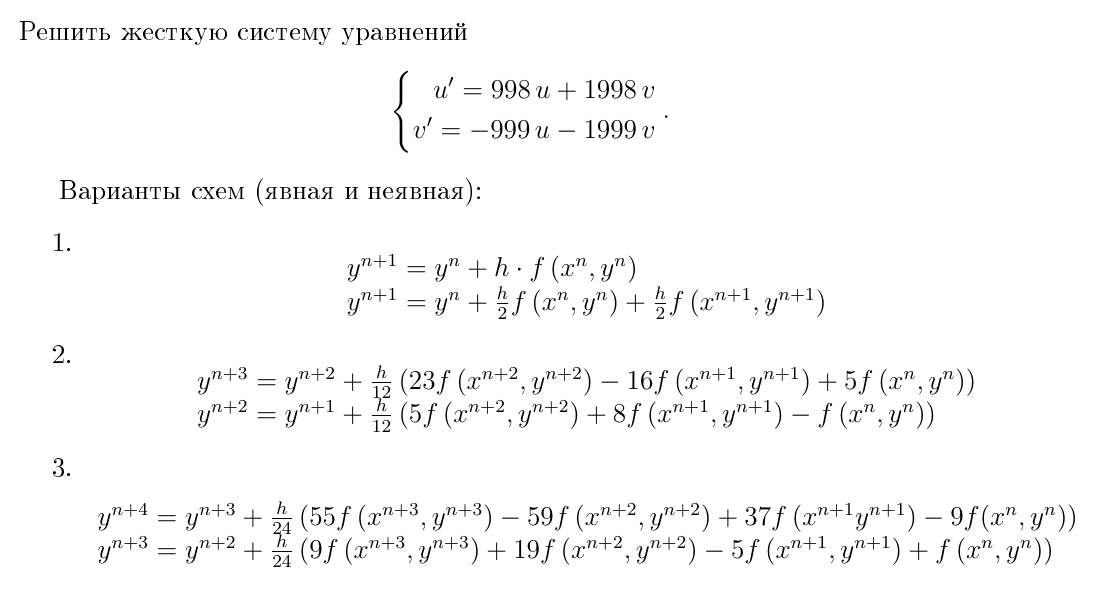

In [12]:
Image('task 8.png')